# Primer entrega
 
Llegamos al final del primer sprint y estamos en condiciones de analizar un dataset, entrenar un primer modelo (de regresión o clasificación) y evaluar resultados.
 
En este proyecto, trabajaremos con un dataset que contiene información sobre personas. La idea es predecir si la persona tiene un salario anual mayor a 50K dólares.
 
### Consignas:

A diferencia de los trabajos que venimos haciendo en clases, en los cuáles nos íbamos guiando por consignas o tips en un notebook, en este caso les toca a ustedes definir qué análisis les parece necesario hacer, qué algoritmo utilizar y qué métrica medir (justificando por qué).
 
La idea es que el notebook sea una especie de "informe" en el que ustedes puedan explicar de forma simple a una persona cualquiera lo que hicieron. Aprovechen las celdas de texto y agreguen los gráficos que les parezca necesarios. Como primer paso, deben identificar si se trata de un problema de regresión o clasificación, hacer un análisis exploratorio de los datos (presentando conclusiones siempre) y finalmente entrenar un modelo para generar sus predicciones.
 
Si les es útil, pueden agregar datos de otras fuentes (por ejemplo datasets públicos del país, o lo que sea) siempre justificando sus decisiones.
 
Son libres de probar cualquiera de los modelos que vimos, pueden dejar los resultados de todo lo que prueben con sus correspondientes conclusiones para mostrar cómo llegan al resultado final.

Se les entrega 3 archivos:
- train.csv: Es el dataset que utilizarán para entrenar su modelo. Contiene features y el target
- test.csv: Este archivo, contiene únicamente features (incluyendo el ID de la persona). Ustedes deben predecir el target para todas estas personas y armar un archivo que contenga las columnas ID, PRED 
- submit_example.csv: El archivo que entreguen tiene que tener exactamente este formato, pero con sus predicciones. Es decir, tiene que contener las columnas ID (que se corresponde al ID de la persona en el set test.csv) y PRED (que toma los valores 1 y 0. 1 significa que la persona gana más de 50K y 0 significa que no).

Deben entregar:
- Notebook con análisis e implementación del modelo predictivo
- Archivo en formato csv con las predicciones para el set de test.

## A tener en cuenta

- En la columna workclass van a ver los valores: 'Self-emp-not-inc' y 'Self-emp-inc' [acá](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html) pueden encontrar info sobre su significado.
- Con pandas tienen la función to_csv que les permite exportar un dataframe a csv. Recuerden que tienen que especificar en el parámetro index, que no quieren que el index quede en el archivo csv.

## Archivos

Los archivos necesarios pueden descargarlos de los siguientes links:

- [train.csv](https://drive.google.com/file/d/1fpy7JaVdFlFPHa3kWKmem_E4O7NqhBax/view?usp=sharing)
- [test.csv](https://drive.google.com/file/d/1z927EgBNSOJ3iWorIGz2XEjlrfD0Koaw/view?usp=sharing)
- [submit_example.csv](https://drive.google.com/file/d/1JAdndD1u1F2_TzM-uhArTWW7eepupmuZ/view?usp=sharing)

## Fecha de entrega

La entrega se tiene que enviar por mail (puede ser un link a google drive) a alexispacek@gmail.com.

1 entrega por grupo.

Por favor indicar el nombre de todos los integrantes en el mail o al comienzo del notebook.

Fecha limite: Domingo 13 de Noviembre.

Steps para la construcción de un  modelo de Machine Learning

    Data Exloration( Análisis uni variado: nulos, faltantes, outliers, duplicados y distribuciones. Análisis multi variado -features con respecto al target-: análisis de correlaciones.)
    Pre-processing (en caso de ser necesario):

    - Data Encoding (en caso de ser necesario: - One Hot, Label Encoding, etc)
    - Data Scaling (o escalado de datos): max-min, standar

    Feature Engineering: ej: en una bbdd de usuarios, si tengo la fecha de nacimiento puedo saber la edad.
    Train-Test Split: recomendado 80/20 o 70/30
    Construir el modelo.
    Training del modelo y evaluación con las métricas correspondientes.
    Evolución del modelo haciendo tuneo de hiper parámetros.
    Servir predicciones (exportar un .csv o similar).
    Interpretación de los resultados y conclusiones.

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [91]:
df = pd.read_csv('CSV/train.csv')

In [3]:
df.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


## Análisis exploratorio


#### diccionario de datos

In [92]:
df.shape

(27656, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       27656 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      27656 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27656 non-null  object
 14  income          27656 non-null  object
 15  ID              27656 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


In [142]:
df.isna().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,27656.0,16274.894851,9410.041750,0.0,8104.75,16296.0,24431.25,32559.0
age,27656.0,38.610356,13.659928,17.0,28.00,37.0,48.00,90.0
education.num,27656.0,10.093506,2.566083,1.0,9.00,10.0,12.00,16.0
capital.gain,27656.0,1099.991503,7487.323462,0.0,0.00,0.0,0.00,99999.0
capital.loss,27656.0,88.284387,405.821328,0.0,0.00,0.0,0.00,4356.0
hours.per.week,27656.0,40.446666,12.369212,1.0,40.00,40.0,45.00,99.0
ID,27656.0,16267.565736,9403.092602,0.0,8104.75,16291.0,24416.25,32535.0


In [144]:
df.head(5)

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


In [145]:
def mostrar_unique_categorical(df, categorical_features):
    for col in categorical_features:
        print(col)
        print(df[col].unique())
        print()

def mostrar_unique_numerical(df, numerical_features):
    for col in numerical_features:
        print(col)
        print(np.sort(df[col].unique()))
        print()

In [146]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

mostrar_unique_categorical(df, categorical_features)

workclass
['Local-gov' 'Private' 'Federal-gov' 'Self-emp-not-inc' '?' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education
['HS-grad' 'Bachelors' 'Some-college' '7th-8th' 'Assoc-voc' 'Masters'
 'Assoc-acdm' '1st-4th' '5th-6th' 'Prof-school' '9th' '10th' '11th' '12th'
 'Doctorate' 'Preschool']

marital.status
['Divorced' 'Married-civ-spouse' 'Never-married' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation
['Protective-serv' 'Exec-managerial' 'Craft-repair' 'Prof-specialty'
 'Tech-support' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Farming-fishing' 'Handlers-cleaners' '?' 'Sales' 'Machine-op-inspct'
 'Priv-house-serv' 'Armed-Forces']

relationship
['Own-child' 'Wife' 'Husband' 'Not-in-family' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex
['Female' 'Male']

native.country
['United-States' '?' 'Jamaica' 'India' 'Mexico' 'Philippines'
 'Dominican-Republic' 'El-Salvador' 'Ch

In [147]:
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week','education.num']
#numerical_features = df.select_dtypes(include = ['number']).columns       
mostrar_unique_numerical(df, numerical_features)

age
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]

capital.gain
[    0   114   401   594   914   991  1055  1086  1111  1151  1173  1409
  1424  1455  1471  1506  1639  1797  1831  1848  2009  2036  2050  2062
  2105  2174  2176  2202  2228  2290  2329  2346  2354  2387  2407  2414
  2463  2538  2580  2597  2635  2653  2829  2885  2907  2936  2961  2964
  2977  2993  3103  3137  3273  3325  3411  3418  3432  3456  3464  3471
  3674  3781  3818  3887  3908  3942  4064  4101  4386  4416  4508  4650
  4687  4787  4865  4931  4934  5013  5060  5178  5455  5556  5721  6360
  6418  6497  6514  6723  6767  6849  7298  7430  7443  7688  7896  7978
  8614  9386  9562 10520 10566 10605 11678 13550 14084 14344 15020 15024
 15831 18481 20051 22040 25124 25236 27828 34095 41310 99999]

capital.loss
[   0  155  213  323  419

In [148]:
df[['education.num', 'education']].drop_duplicates().sort_values('education.num')


,education.num,education
833,1,Preschool
24,2,1st-4th
32,3,5th-6th
9,4,7th-8th
41,5,9th
85,6,10th
92,7,11th
113,8,12th
0,9,HS-grad
6,10,Some-college


In [ ]:
# Graficamos las variables categoricas

In [88]:
def graficar_distribucion_categoricas(df, categorical_features):
    ncount=len(df)
    #fig, ax = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10,40))

    for i, feature in enumerate(categorical_features):

        plt.figure(figsize=(20,4))
        
        ax = sns.countplot(x=df[feature], order=df[feature].value_counts().index)
        ax.set_title(f'Countplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        ax.tick_params(axis='x', rotation=45)
        #ax[i].bar_label(ax[i].containers[0], rotation=300)
        
        #ax[i][1] = sns.boxplot(x=df[feature], ax=ax[i][1])
        #ax[i][1].set_title(f'Boxplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom',rotation=45)
        
        plt.xticks(rotation=90)
        plt.show()
    #plt.tight_layout()
    #plt.xticks(rotation=90)
    #plt.show()

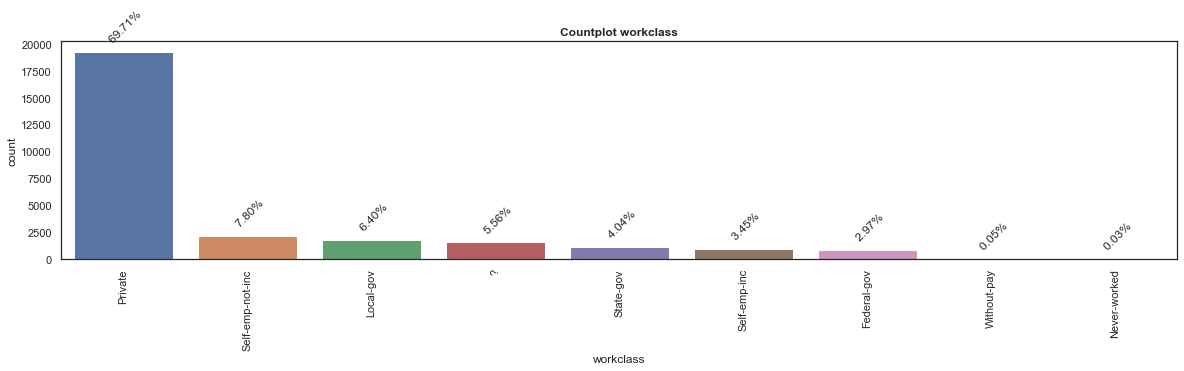

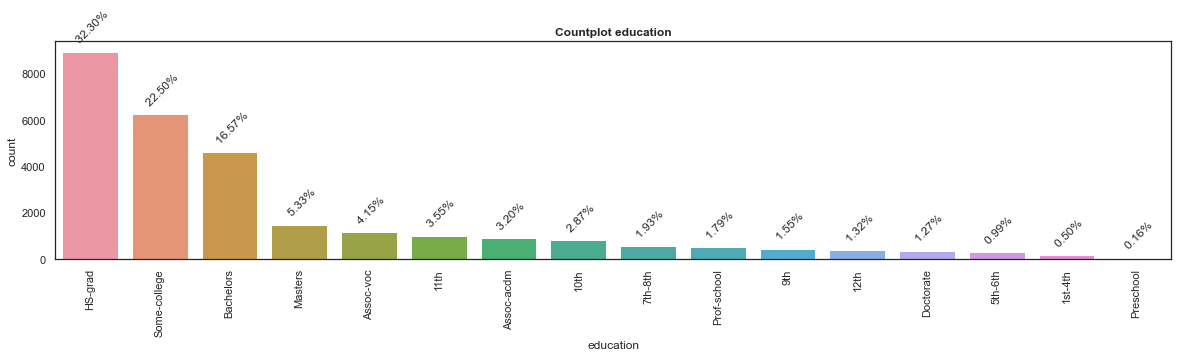

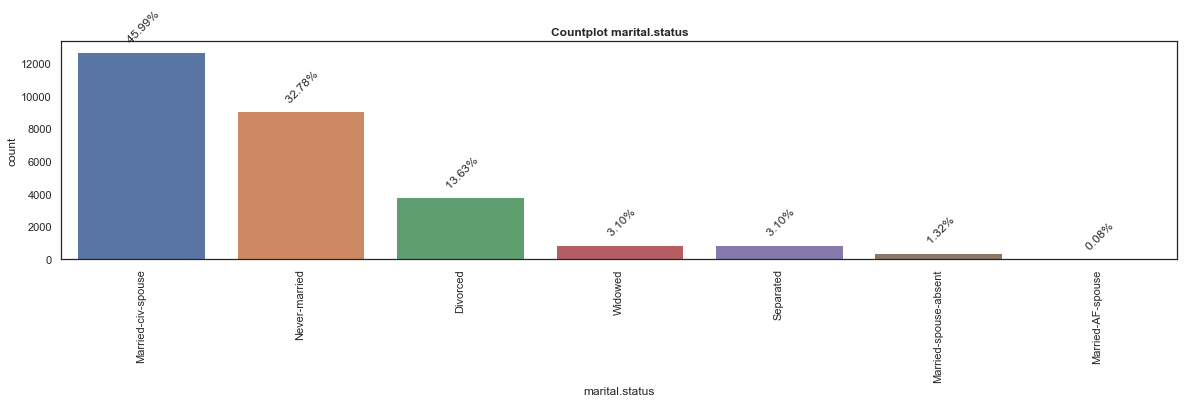

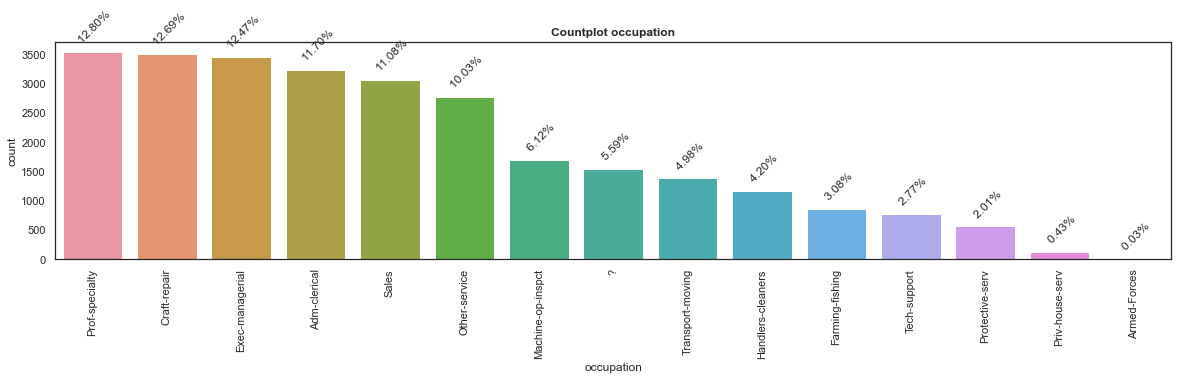

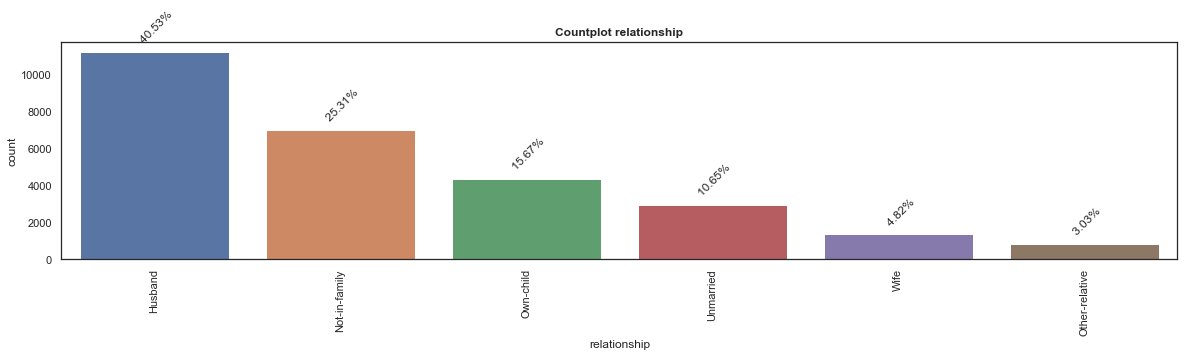

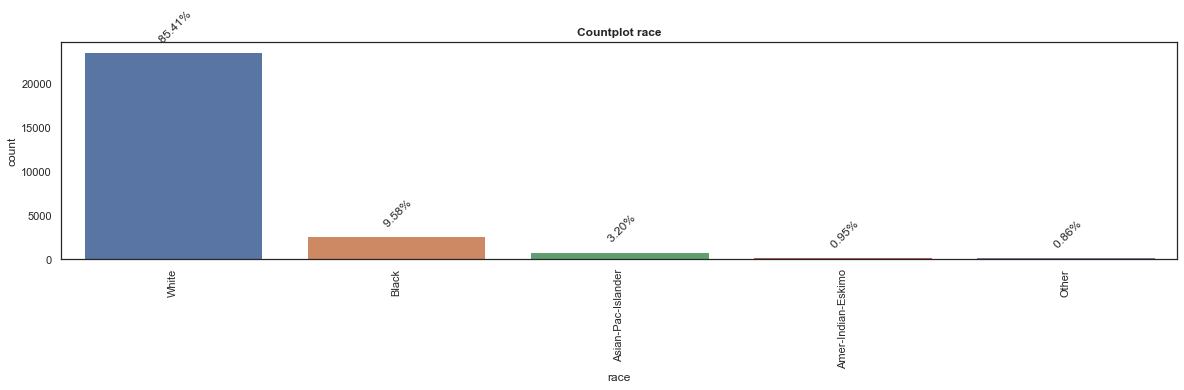

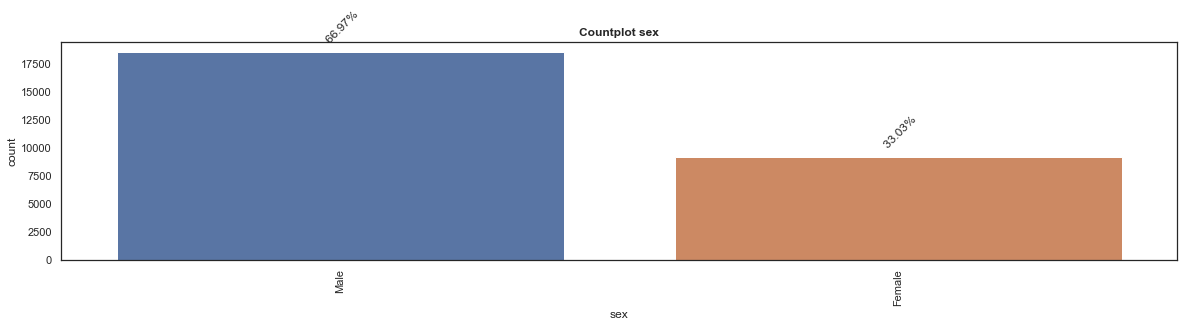

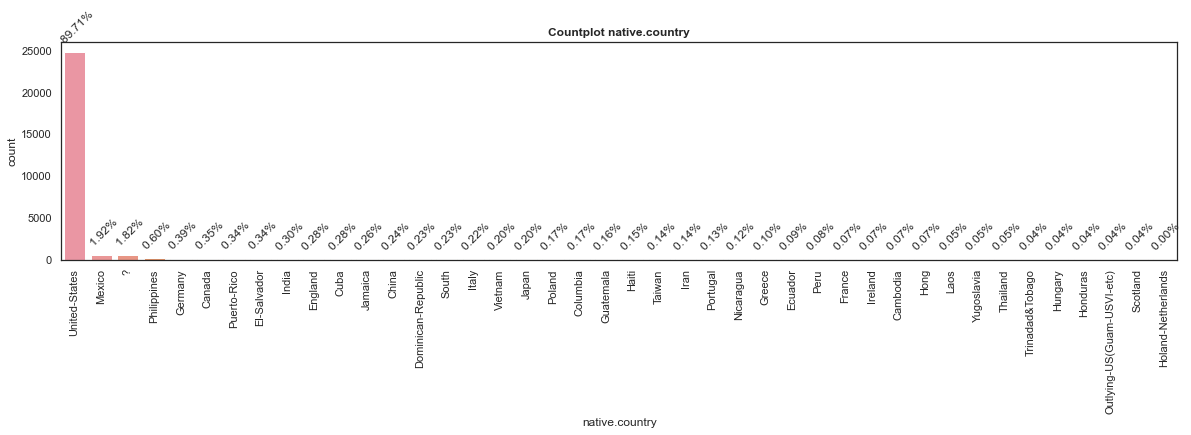

In [89]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex',  'native.country']

graficar_distribucion_categoricas(df, categorical_features)

###  Conclusiones
- Workclass podemos ver que tenemos que predomina la clase privada.
- education contiene mayoritariamete personas que terminaron la securndaria
- marital.status contiene mayoritariamete personas que estan casadas
- occupation vemos que tenemos 5 categorias predonimantes.
- relationship  la mayoria son esposos.
- race la mayoria son de raza blanca.
- sex la mayoria son hombre y se ve tambien con la variable realtionship.
- native.country la son de eeuu

# visualizamos distribución de variables numericas

In [152]:
def graficar_distribucion_numericas(df, numerical_features):
    
    sns.set(style="darkgrid")

    for i, feature in enumerate(numerical_features):
        plt.figure(figsize=(18,10))
        ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=30)
        # bottom left
        ax2 = plt.subplot2grid((2, 2), (1, 0))
        # bottom right
        ax3 = plt.subplot2grid((2, 2), (1, 1))
    
     
        ax1 = sns.kdeplot(x=df[feature], ax=ax1, shade=False, color='crimson')
        ax1.set_title(f'kdeplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        kdeline = ax1.lines[0]
        mean = df[feature].mean()
        median = df[feature].median()
        xs = kdeline.get_xdata()
        ys = kdeline.get_ydata()
        height = np.interp(mean, xs, ys)
        height1 = np.interp(median, xs, ys)
        ax1.vlines(mean, 0, height, color='crimson', ls=':')
        ax1.vlines(median, 0, height1, color='darkviolet', ls=':')
        ax1.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
        
        ax2 = sns.histplot(x=df[feature], ax=ax2, kde=True)
        ax2.set_title(f'Histplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        
        ax3= sns.boxplot(x=df[feature], ax=ax3)
        ax3.set_title(f'Boxplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        
        plt.show()
        
    plt.tight_layout()
    plt.show()

In [153]:
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week','education.num']

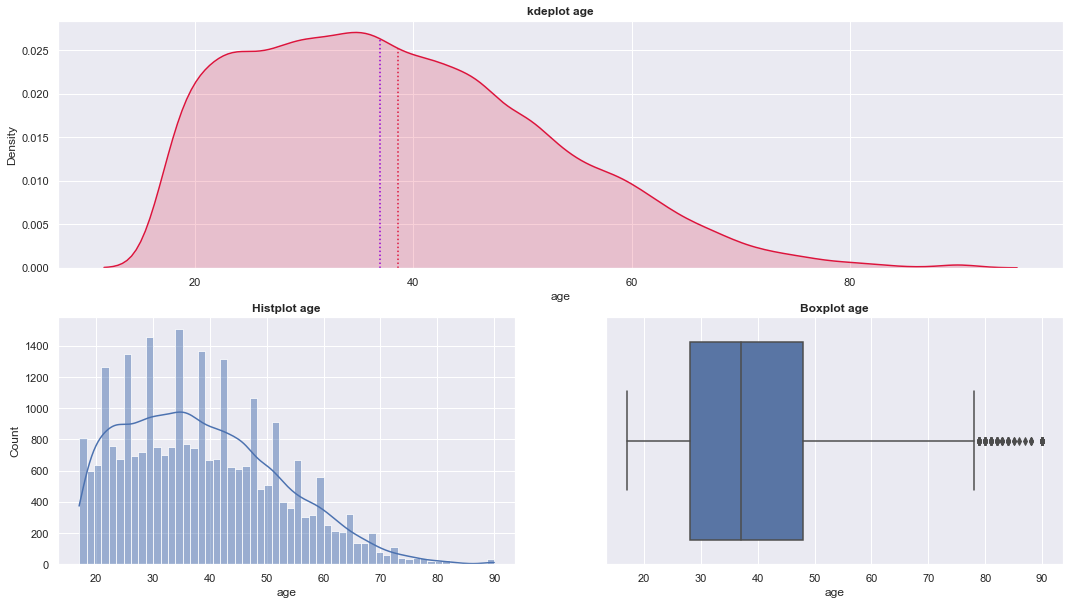

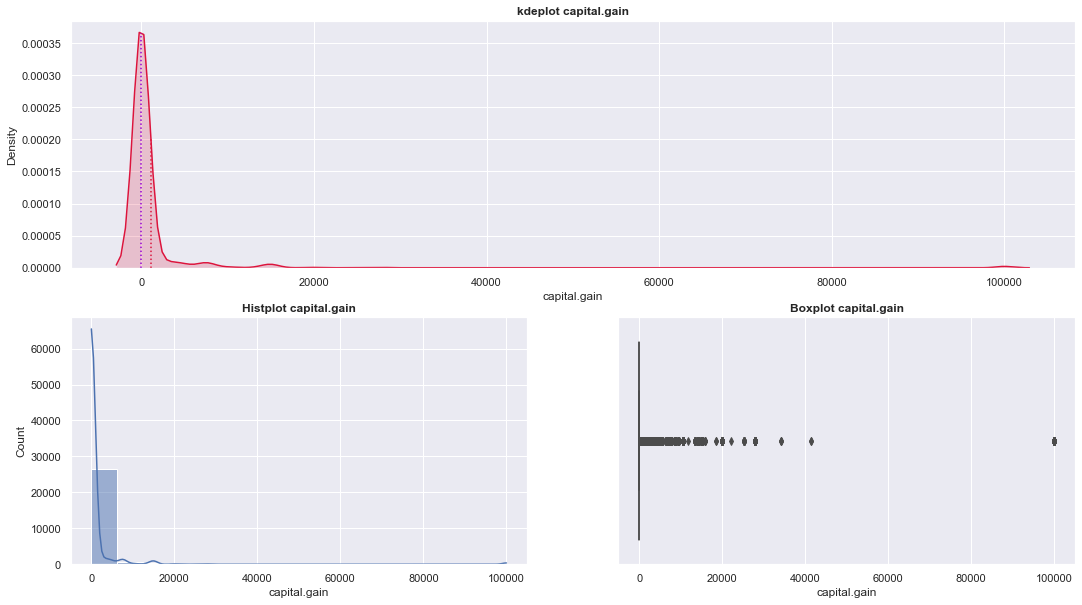

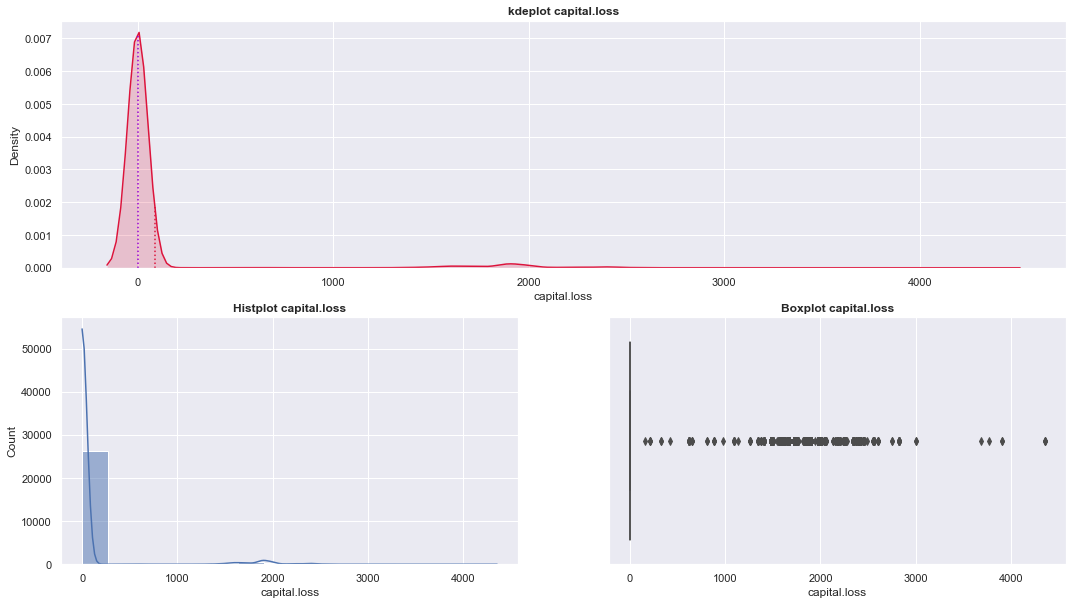

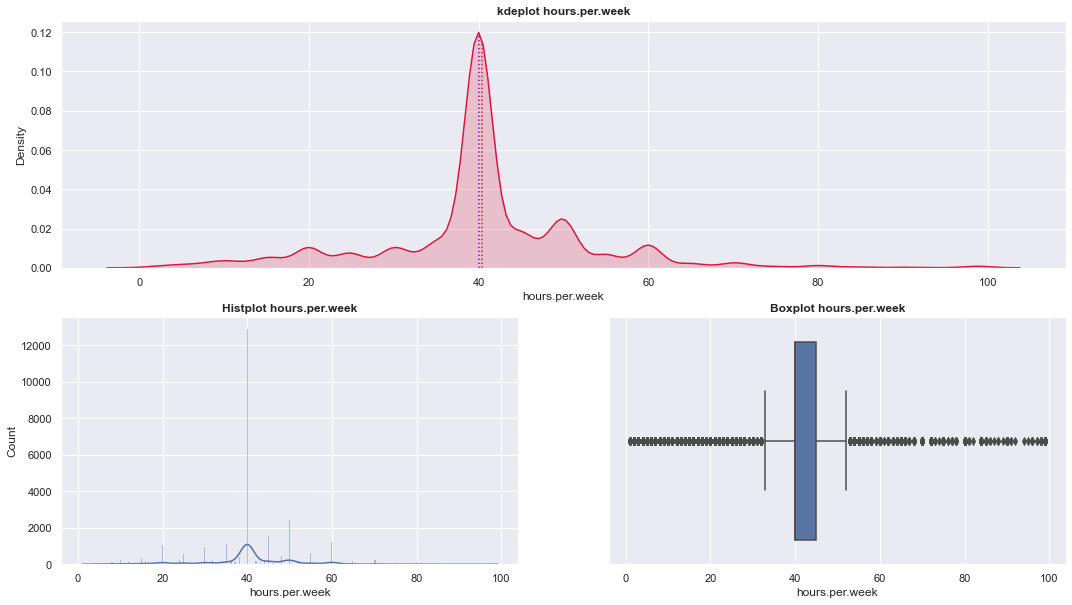

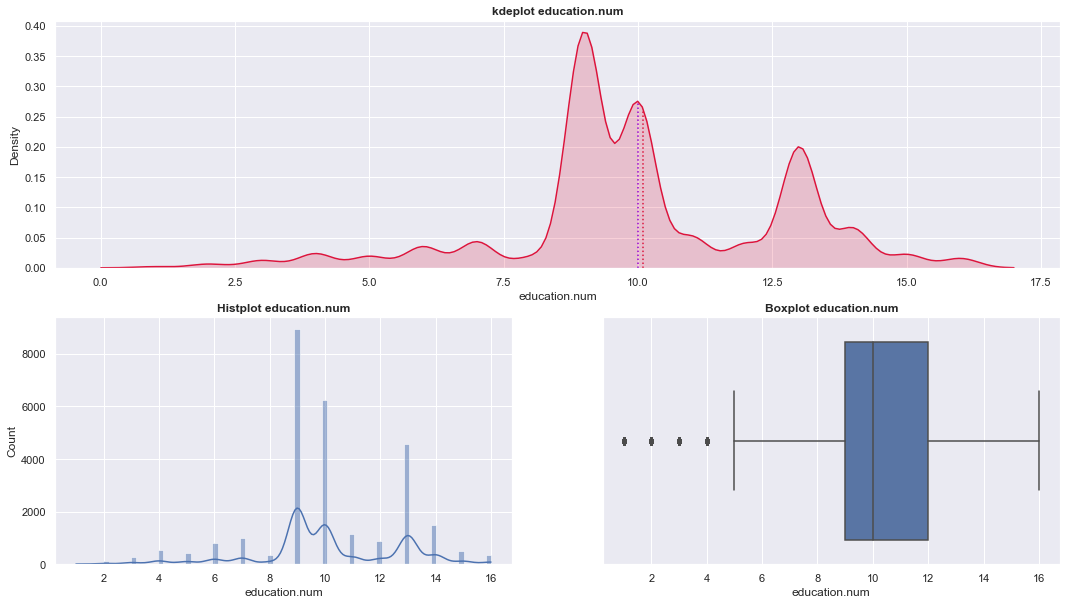

<Figure size 432x288 with 0 Axes>

In [154]:
graficar_distribucion_numericas(df, numerical_features)

### Conclusiones de variables numericas

Por lo general, la media suele estar influenciada por valores atípicos y la mediana suele ser una medida con mayor robustez. 

- age se observa que mayoritariamente son personas alrdedor de 36 años, y contiene outleirs que podemos considerarlos a partir de los 70 años.
- capital.gain vemos con la mediana que el 50% son menores a 1000. Se visualiza facilmente los aoutliers.
- capital.loss vemos que son valores pequeños. Se visaulizan aoutliers.
- hours.per.week la cantidad de horas que trabajan las personas en general ronda las 40hs. Tambien se visualizan outliers.
- education.enum se visualiza que la mayoria termino la escuela secundaria.

### Target


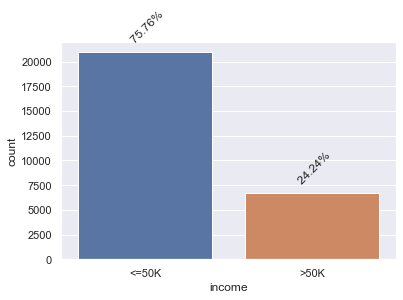

In [156]:
sys.stdout = open(os.devnull, "w")
sys.stderr = open(os.devnull, "w")
ncount=len(df)
ax = sns.countplot(df['income'])
#ax.bar_label(ax.containers[0])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
        ha='center', va='bottom',rotation=45)
plt.show()

In [35]:
df.income.value_counts()

<=50K    20953
>50K      6703
Name: income, dtype: int64

In [36]:
df.income.value_counts(normalize=True)

<=50K    0.757629
>50K     0.242371
Name: income, dtype: float64

In [37]:
# ¿y en porcentajes?
df['income'].value_counts(normalize=True) * 100

<=50K    75.762945
>50K     24.237055
Name: income, dtype: float64

Conclusión: dataset totalmente desbalanceado.

### LIMPIEZA DE OUTLIERS


#### limpieza de outliers "edad"

In [162]:
# Porcentaje de outliers a eliminar 
df[~(df['age']>=min) & (df['age']<=max)].count()[1] * 100 / len(df)  # 0.44%

0.0

In [158]:
q75,q25=df['age'].quantile([0.75,0.25])
iqr=q75-q25
min=df['age'].min()
max=round(q75+(iqr*1.5),0)
df = df[(df['age']>=min)&(df['age']<=max)] # 0.44%

In [168]:
#### Eliminamos outlier de horas.

df[~(df['hours.per.week']<= 70)].count()[1] * 100 / len(df)  # 1.55%


0.0

In [167]:
df = df[df['hours.per.week'] <= 70] 

In [54]:
#df = df[~((df['capital.gain'] == 0) & (df['capital.loss'] != 0))] # 4.7 %

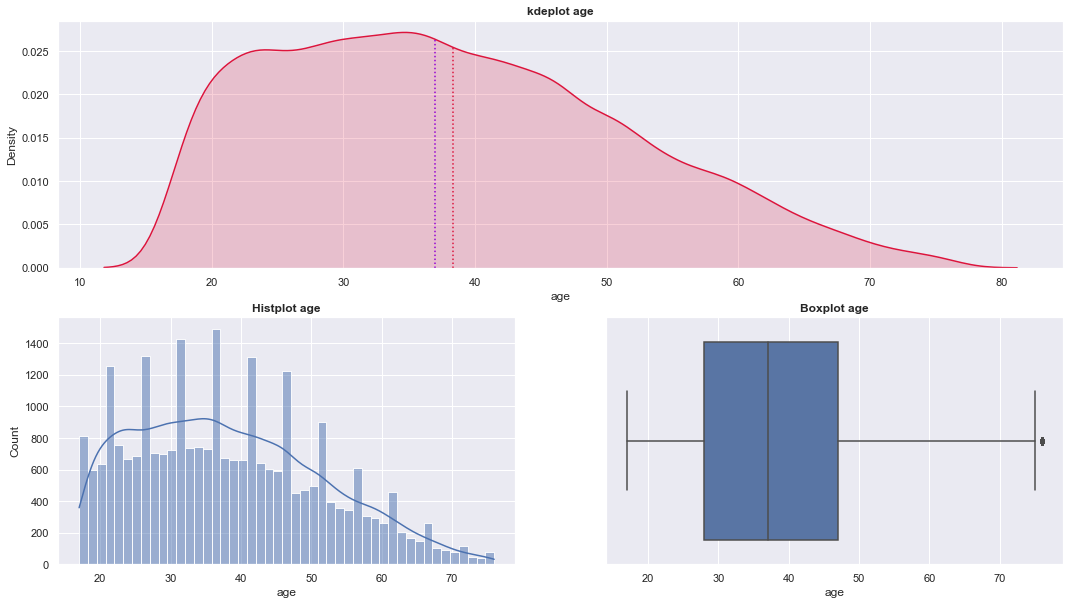

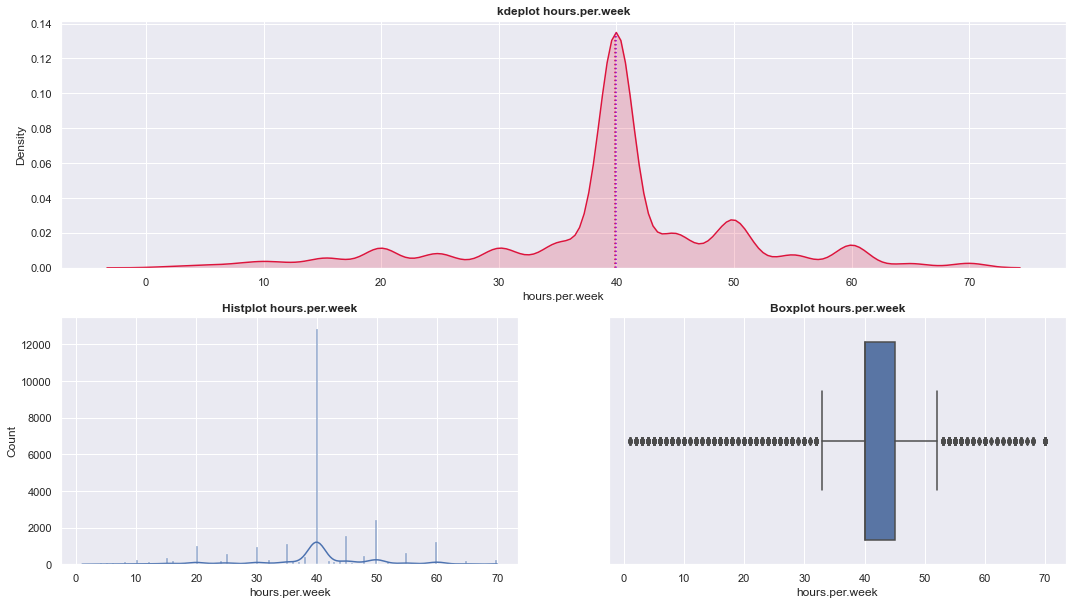

<Figure size 432x288 with 0 Axes>

In [169]:
#graficamos nuevamente despues de quitar los outliers
numerical_features=["age","hours.per.week"]
graficar_distribucion_numericas(df, numerical_features)

### Analisis de variables 

In [59]:
def graficar_distribucion_categoricas_target(df, categorical_features, target):
    ncount=len(df)
    #fig, ax = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10,40))

    for i, feature in enumerate(categorical_features):

        plt.figure(figsize=(20,4))
        
        #ax = sns.countplot(x=df[feature], order=df[feature].value_counts().index, hue=target)
        ax=sns.countplot(data=df, x=feature,order=df[feature].value_counts().index, hue=target)
        ax.set_title(f'Countplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        ax.tick_params(axis='x', rotation=45)
        #ax[i].bar_label(ax[i].containers[0], rotation=300)
        
        #ax[i][1] = sns.boxplot(x=df[feature], ax=ax[i][1])
        #ax[i][1].set_title(f'Boxplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})

        """
        # ver de adaptar las etiquetas de acuerdo al target para mostrar porcentaje

        line1, = ax.plot([2, 3, 3], label=target)
        line2, = ax.plot([3, 4, 4], label="0= <=50K ", linestyle='--')
        porcentaje = df['income'].value_counts(normalize=True) * 100
        line3, = ax.plot([4, 5, 5], label=f"porcentaje <= 50k: {porcentaje[0]}", linestyle='--')
        line4, = ax.plot([4, 5, 5], label=f"porcenta > 50k: {porcentaje[1]}", linestyle='--')
            
        ax.legend(handles=[line1,line2,line3,line4], loc='upper right')            
        """   
        
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom',rotation=45)
        
        plt.xticks(rotation=90)
        plt.show()
    #plt.tight_layout()
    #plt.xticks(rotation=90)
    #plt.show()

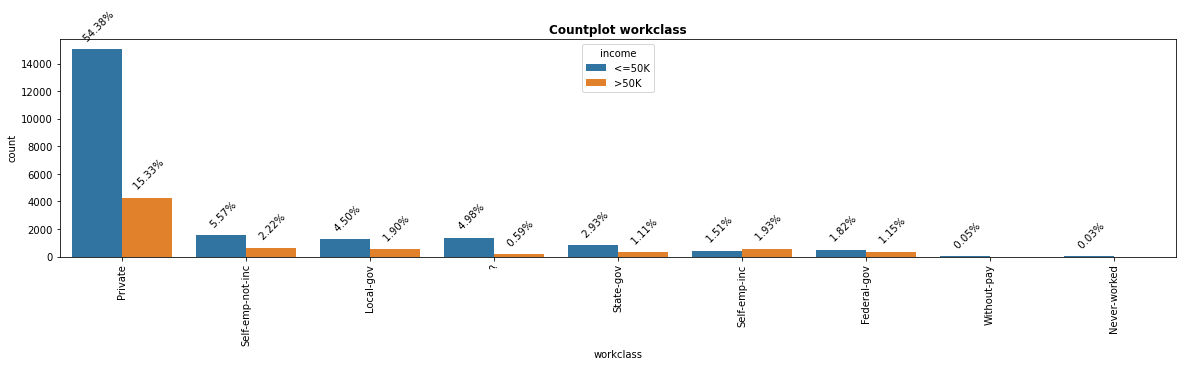

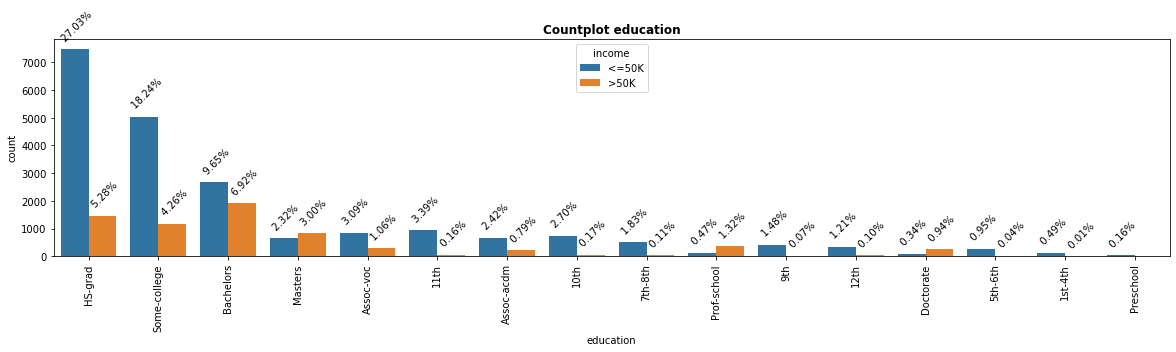

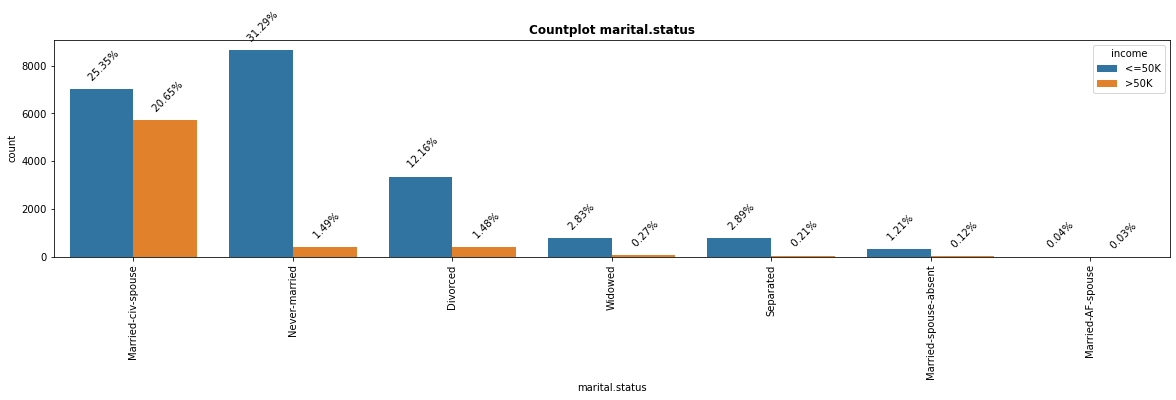

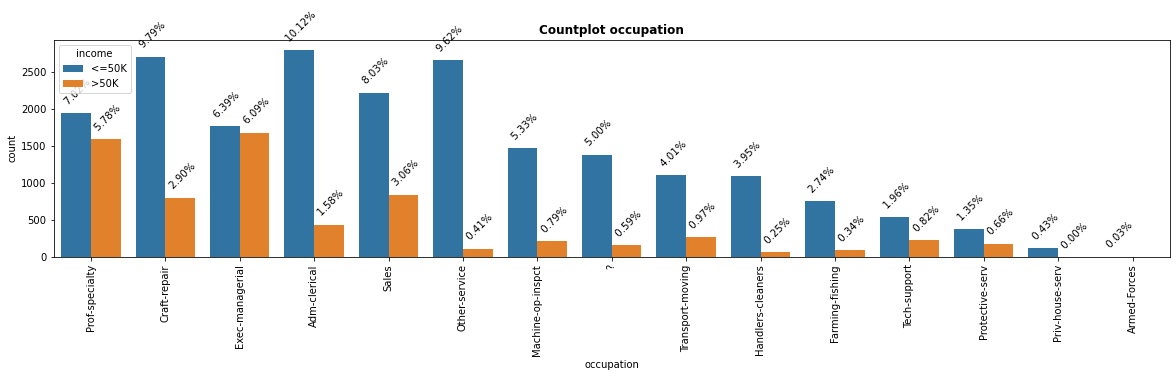

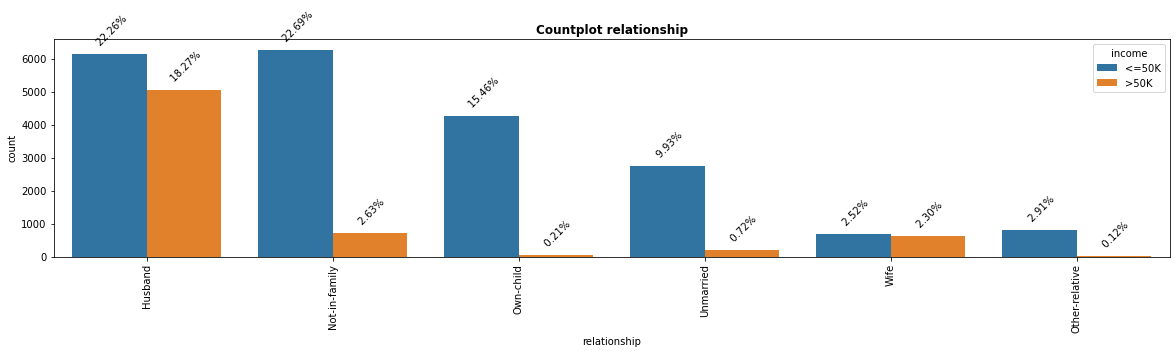

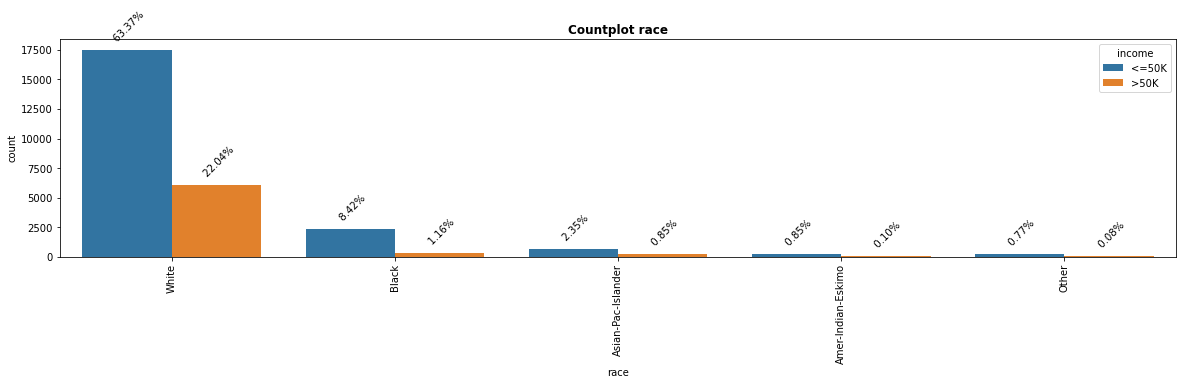

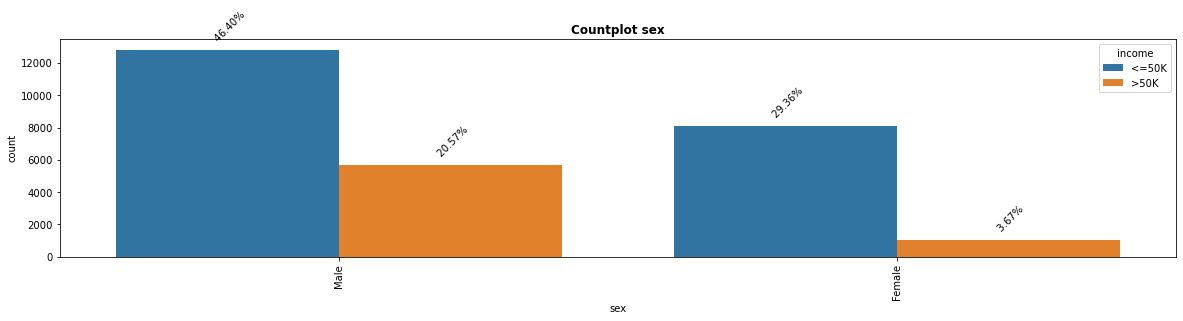

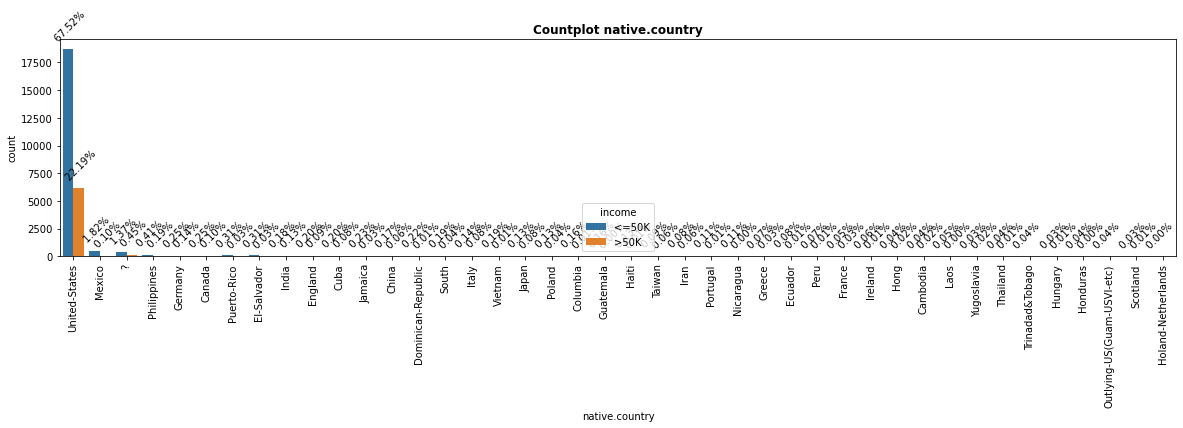

In [60]:
# Distribución de nuestra variable target
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex',  'native.country']
target= "income"

graficar_distribucion_categoricas_target(df, categorical_features,target)

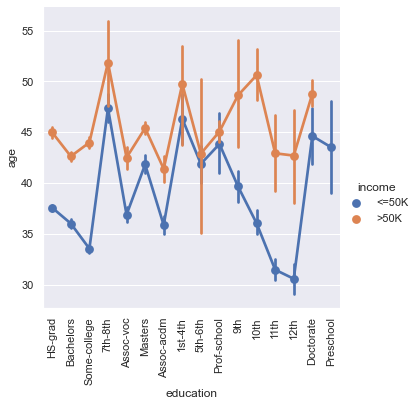

In [181]:
sns.catplot(x="education",y="age",data=df,kind="point", hue="income",split=True)
plt.xticks(rotation=90)   
plt.show()

### Conclusiones sobre variables y target

- workclase vemos que un 15% del total de dataset trabajan en el ambito privado y superan los 50k.
- education vemos que hay un 7% del total que gana mas 50k y son licenciados.
- marital.status vemos que hay un 20.55% del total que gana mas 50k y son casados.
- occupation  vemos que la mayor cantidad de personas pertenecen a los rubros graft-repair
- prof-speciality y exec-managerial y el 14.76 % supera los 50k
- relationship como vimos el dataset esta desbalanceado, se visualiza que los esposos predominan.
- race idem relationship
- sex  idem relationship


### correlaciones

In [95]:
# Eliminamos variables que no nos interesan.
#df_copy.drop(['index','education.num','ID'], axis=1, inplace=True)
df.drop(['index','ID'], axis=1, inplace=True)

Graficamos correlacion entre variables con pairplot

<Figure size 1440x1440 with 0 Axes>

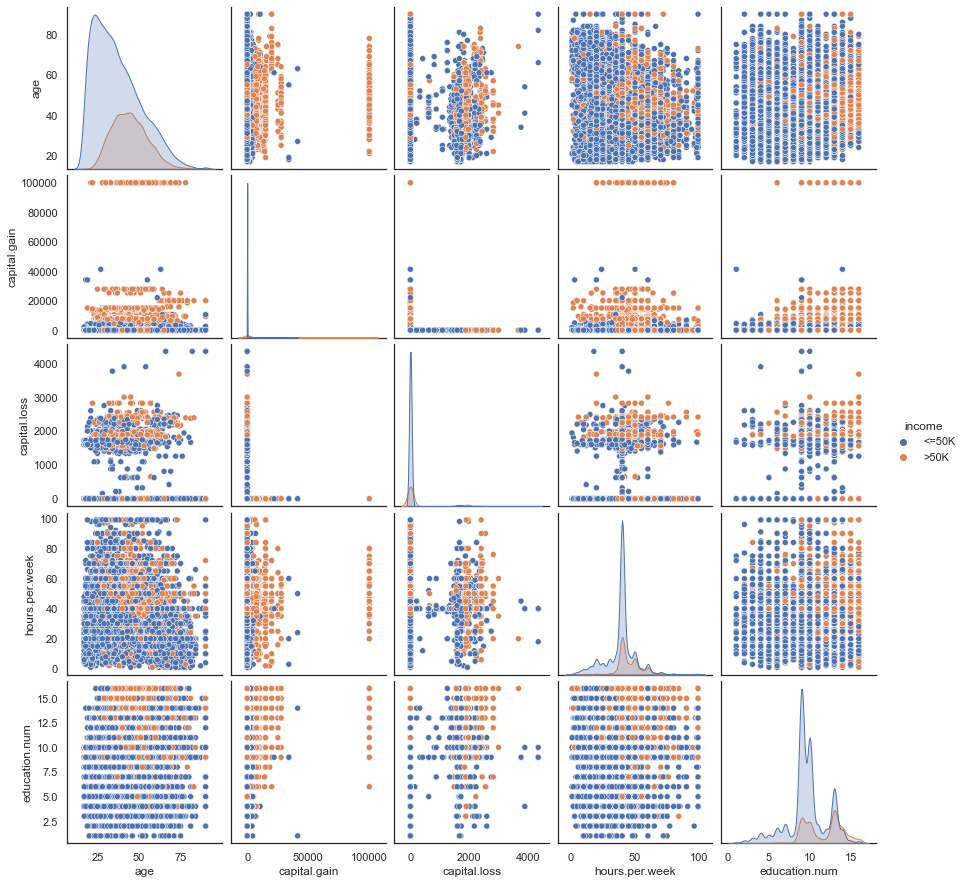

In [98]:
# Correlaciones entre variables numericas
plt.figure(figsize=(20,20))
sns.pairplot(df[['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'education.num','income']], hue = 'income')

Matriz de Correlación

<AxesSubplot:>

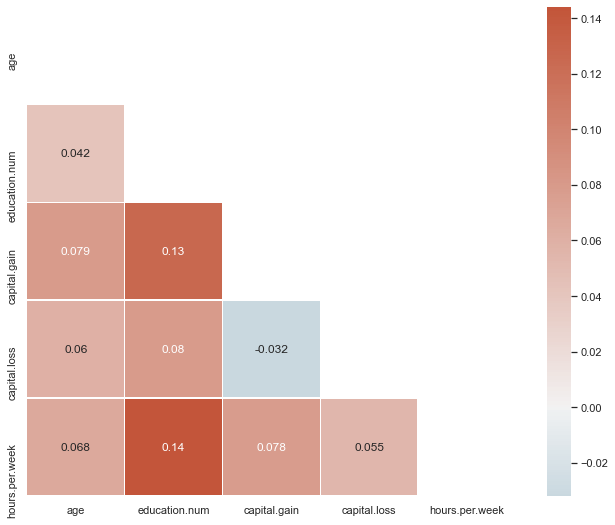

In [100]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

HAY CORRELACION ENTRE VARIABLES? PODEMOS ELIMINAR ALGUNA?

<img src="https://www.maximaformacion.es/wp-content/uploads/2021/07/Que-es-la-correlacion_valores-del-coeficiente.png" width="700px">

¿Hay Correlación entre dos variables?

In [ ]:
# Scatter plot para ver correlacion grafica entre variables
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='Recency', y='MntTotal', data=df_copy)
plt.show()

## Train Test Split

In [204]:
df = pd.read_csv('CSV/train.csv')

In [205]:
df.drop(['index','education.num','ID'], axis=1, inplace=True)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [206]:
# Replace
map_income = {'<=50K':0,
            '>50K':1}

df['income'] = df['income'].replace(map_income)

In [207]:
# ACA APLICO HOT ENCODER ... SAPE!!! 
features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

df = aplicarOHE(df, features)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11528\3454965444.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = pd.concat([df, encoded_df], axis=1, join='inner').drop(i, 1)
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11528\3454965444.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the ar

In [208]:
X = df.drop(['income'], axis=1).copy()
y = df['income'].copy()

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [210]:
conjuntos = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
for key, value in conjuntos.items():
    print(f"{key}: {len(value)} filas")

X_train: 22124 filas
X_test: 5532 filas
y_train: 22124 filas
y_test: 5532 filas


## Feature engineering

El único preprocesamiento que aplicaremos sobre los datos sera un StandardScaler para poder entrenar luego un KNN.

El preprocesamiento lo hacemos sobre el set de train y luego lo aplicamos al de test antes de generar las predicciones.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def aplicarOHE(df, categorical_features_sin_target):
    for i in categorical_features_sin_target:

        # instanciamos
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

        # entrenamos
        enc.fit(df[i].values.reshape(-1,1))

        # transformamos
        encoded = enc.transform(df[i].values.reshape(-1, 1))

        # getter
        encoded_columns = enc.get_feature_names([i])
        encoded_df = pd.DataFrame(data=encoded, columns= encoded_columns)
        df = pd.concat([df, encoded_df], axis=1, join='inner').drop(i, 1)
    
    return df

In [ ]:
# DUDA: ya hicimos el Hot Encoder en la parte de correlación para ver si podríamos eliminar alguna variable... acá va de nuevo?

# Baseline

In [38]:
def baseline_prediction(X):
    y_pred = []
    for i in range(len(X)):
      
        y_pred.append(0)
    return y_pred

El modelo que desarrollemos, tiene que ser mejor que este baseline. ¿ Qué accuracy_score tiene el baseline ?

In [40]:
from sklearn.metrics import accuracy_score

#tengo que tener los datos reales y los predecidos

y_pred = baseline_prediction(X)

# MEDIR ACCURACY_SCORE DEL BASELINE
accuracy = accuracy_score(y,y_pred)

print(accuracy)

0.7576294474978305


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     20953
           1       0.00      0.00      0.00      6703

    accuracy                           0.76     27656
   macro avg       0.38      0.50      0.43     27656
weighted avg       0.57      0.76      0.65     27656



C:\Users\iparra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iparra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iparra\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predecir con train.csv

# DecissionTreeClasiffier

estan en Mentoria_datasets_desbalanceados_resueltos y into_a_ML_resuelto

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [211]:
#defino las listas de los accuracy scores
lista_accuracy_train = []
lista_accuracy_test = []

#defino lista para el nro de vecinos
profundidad = [1,2,3,4,5,6,7,8]

for p in profundidad:

    tree = DecisionTreeClassifier(max_depth=p)
    tree.fit(X_train, y_train)
    
    #obtengo predicciones
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    #accuracy test
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    #guardo los valores de accuracy
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

In [212]:
from tabulate import tabulate
print(tabulate([lista_accuracy_train, lista_accuracy_test],headers=['k=1', 'k=2', 'k=3', 'k=4', 'k=5','k=6','k=7','k=8']))

     k=1       k=2       k=3       k=4       k=5       k=6       k=7       k=8
--------  --------  --------  --------  --------  --------  --------  --------
0.757639  0.803652  0.821958  0.834885  0.849123  0.852875  0.856129  0.859745
0.757592  0.803145  0.819414  0.830441  0.847433  0.850687  0.85376   0.857195


Text(0.5, 1.0, 'DecisionTreeClassifier Performance')

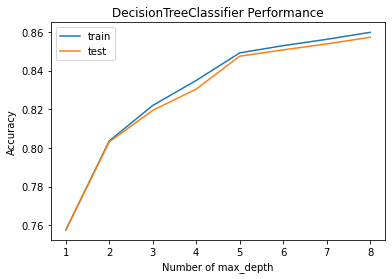

In [222]:
plt.plot(profundidad, lista_accuracy_train, label = 'train')
plt.plot(profundidad, lista_accuracy_test, label = 'test')
plt.legend()
plt.xlabel('Number of max_depth')
plt.ylabel('Accuracy')
plt.title("DecisionTreeClassifier Performance")

TreeClassifier con max_depth = 5

In [218]:
#Preparo el modelo
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [219]:
#Realizo las predicciones con los conjuntos de test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [220]:
#Evalúo su accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8036521424697162
Porcentaje de aciertos sobre el set de evaluación: 0.8031453362255966


In [79]:
#Grafico la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[3972,  219],
       [ 625,  716]], dtype=int64)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


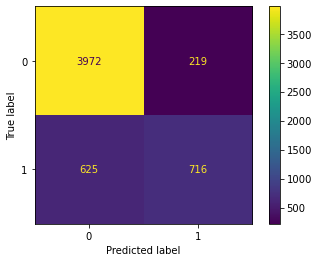

In [80]:
plot_confusion_matrix(tree, X_test, y_test)

In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4191
           1       0.98      0.19      0.32      1341

    accuracy                           0.80      5532
   macro avg       0.89      0.59      0.60      5532
weighted avg       0.84      0.80      0.75      5532



Aplicando a test.csv

In [83]:
df_test = pd.read_csv("CSV/test.csv")
df_test.drop(columns=['index','education.num','ID'], inplace=True)
df_test.head(1)

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,53,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States


In [84]:
categorical_features_sin_target = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

df_test = aplicarOHE(df_test, categorical_features_sin_target)


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11528\3454965444.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = pd.concat([df, encoded_df], axis=1, join='inner').drop(i, 1)
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11528\3454965444.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the ar

In [85]:
df_test.columns.tolist()

['age',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital.status_Divorced',
 'marital.status_Married-AF-spouse',
 'marital.status_Married-civ-spouse',
 'marital.status_Married-spouse-absent',
 'marital.status_Never-married',
 'marital.status_Separated',
 'marital.status_Widowed',
 'occupation_?',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_H

In [86]:
df_test['workclass_Never-worked'] = 0
df_test[ 'workclass_Without-pay'] = 0
df_test[ 'native.country_Holand-Netherlands'] = 0

In [89]:
y_test_pred_prod = tree.predict(df_test)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [91]:
df_submit = pd.read_csv("CSV/submit_example.csv")

In [94]:
df_submit['PRED'] = y_test_pred_prod

In [101]:
# Replace
map_income = {0:'<=50K',
            1:'>50K'}

df_submit['PRED'] = df_submit['PRED'].replace(map_income)

In [102]:
#df_resultado 4881
df_submit.to_csv('submit_example.csv', sep='\t', encoding='utf-8')

# KNN

Vamos a tomar un 15% de los datos para el conjunto de test. Como las clases no están balanceadas, sería bueno utilizar el stratify que nos provee sklearn (vimos en el notebook de la clase pasada)

In [162]:
# Preprocesamiento de datos

# En KNN es muy importante que los datos estén en una misma escala.
df = pd.read_csv('CSV/train.csv')
df.drop(['index','education.num','ID'], axis=1, inplace=True)
# Replace
map_income = {'<=50K':0,
            '>50K':1}

df['income'] = df['income'].replace(map_income)

features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

df = aplicarOHE(df, features)

X = df.drop(['income'], axis=1).copy()
y = df['income'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)




c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11528\3454965444.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = pd.concat([df, encoded_df], axis=1, join='inner').drop(i, 1)
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11528\3454965444.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the ar

In [132]:
from sklearn.preprocessing import StandardScaler

In [165]:
def aplicarStandarScaler(df, features):

    # Creamos una instancia
    scaler = StandardScaler()
    
    # Entrenamos
    scaler.fit(df[features])

    # Transformamos
    df[features] = scaler.transform(df[features])

    # Vemos como quedo
    #df.head()
    return df

In [166]:
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']

X_train = aplicarStandarScaler(X_train, numerical_features)

X_test = aplicarStandarScaler(X_test, numerical_features)

In [ ]:
### NOTA: en KNN_resuelto primero hace el split, luego hace el scaler, y luego el onehotencoder.....

In [136]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [168]:
#defino las listas de los accuracy scores
lista_accuracy_train = []
lista_accuracy_test = []

#defino lista para el nro de vecinos
vecinos = [1,2,3,4,5,6,7,8,9,10]

for k in vecinos:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #obtengo predicciones
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    #accuracy test
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    #guardo los valores de accuracy
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

In [192]:
from tabulate import tabulate

In [200]:
print(tabulate([lista_accuracy_train, lista_accuracy_test],headers=['k=1', 'k=2', 'k=3', 'k=4', 'k=5','k=6','k=7','k=8','k=9','k=10']))


     k=1       k=2       k=3       k=4       k=5       k=6       k=7       k=8       k=9      k=10
--------  --------  --------  --------  --------  --------  --------  --------  --------  --------
0.97731   0.897622  0.900063  0.882029  0.881531  0.872717  0.873305  0.867339  0.867067  0.865892
0.797542  0.816703  0.824295  0.829537  0.832068  0.835864  0.837491  0.835683  0.836045  0.838214


Text(0.5, 1.0, 'KNN Performance')

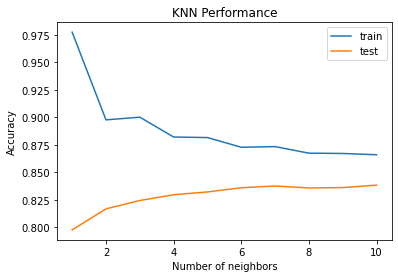

In [182]:
plt.plot(vecinos, lista_accuracy_train, label = 'train')
plt.plot(vecinos, lista_accuracy_test, label = 'test')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title("KNN Performance")

Estamos buscando un patrón en el que el rendimiento en el conjunto de prueba mejore y luego comience a empeorar, y el rendimiento en el conjunto de entrenamiento continúe mejorando.


Parece ser que K=10 es el mejor, no? Si es así, entrenemos de nuevo el modelo con K=10 para hacer las predicciones sobre test.csv

KNN para vecino 5

In [189]:
#Preparo el modelo con K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Realizo las predicciones con los conjuntos de test
y_pred = knn.predict(X_test)

#Evalúo su accuracy
test_acc = accuracy_score(y_test, y_pred)

print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de evaluación: 0.8320679681851049


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


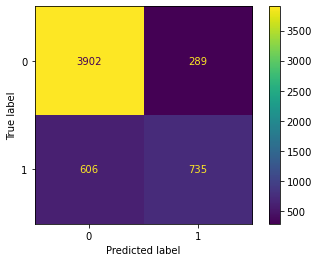

In [187]:
#Grafico la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_pred)

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

Metricas con classification_report

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4191
           1       0.72      0.55      0.62      1341

    accuracy                           0.84      5532
   macro avg       0.79      0.74      0.76      5532
weighted avg       0.83      0.84      0.83      5532



Aplicamos sobre test.csv

In [191]:
df_test = pd.read_csv("CSV/test.csv")
df_test.drop(columns=['index','education.num','ID'], inplace=True)

#df_test.head(1)

categorical_features_sin_target = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']

df_test = aplicarStandarScaler(df_test, numerical_features)
df_test = aplicarOHE(df_test, categorical_features_sin_target)

df_test['workclass_Never-worked'] = 0
df_test[ 'workclass_Without-pay'] = 0
df_test[ 'native.country_Holand-Netherlands'] = 0

y_test_pred_prod = knn.predict(df_test)

df_submit = pd.read_csv("CSV/submit_example.csv")

df_submit['PRED'] = y_test_pred_prod

df_submit.to_csv('submit_example_knn.csv', sep='\t', encoding='utf-8')

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11528\3454965444.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = pd.concat([df, encoded_df], axis=1, join='inner').drop(i, 1)
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Asus\AppData\Local\Temp\ipykernel_11528\3454965444.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the ar

# Usar DecisionTreeClassifier y Remuestreo (se usa con datos desbalanceados)
estan en Mentoria_datasets_desbalanceados_resueltos y into_a_ML_resuelto